In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-20 02:10:00--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M   314KB/s    in 83s     

2025-02-20 02:11:34 (280 KB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
dataset =pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})#explicitly giving some data types
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataset.shape

(541909, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [ ]:
dataset.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
dataset[dataset.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
dataset[dataset.StockCode=="22139"]#we can se for this stock code "RETROSPOT TEA SET CERAMIC 11 PC	" that is repeating most number pf time so we replce that and simalr to others

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
dataset[dataset.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
mostFrequentDescription =dataset[["StockCode", "Description"]].value_counts().reset_index()
mostFrequentDescription.head()

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [ ]:
#so we got the data now we will use merge operation to complete our merge
#o beefore that check for the duplicates in the most frequent description
mostFrequentDescription[mostFrequentDescription.StockCode=='85123A'].value_counts()

StockCode  Description                         count
85123A     ?                                   1        1
           CREAM HANGING HEART T-LIGHT HOLDER  9        1
           WHITE HANGING HEART T-LIGHT HOLDER  2302     1
           wrongly marked carton 22804         1        1
Name: count, dtype: int64

In [ ]:
mostFrequentDescription=mostFrequentDescription.groupby('StockCode').head(1)#we are goruping our data by top most repeated description
mostFrequentDescription.head()

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [ ]:
mostFrequentDescription[mostFrequentDescription.StockCode=='85123A']

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
mostFrequentDescription.columns=['StockCode','Freq Description','count']
dataset1=dataset.merge(mostFrequentDescription, on='StockCode', how='left')
dataset1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
dataset1[dataset1.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq Description,count
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [ ]:
dataset1['Description']=dataset1['Freq Description']

In [ ]:
dataset1[dataset1.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq Description,count
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
1988,536550,85044,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
2024,536552,20950,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
2026,536554,84670,<NA>,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
280754,561498,21610,<NA>,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,<NA>,NaN
281615,561555,37477B,<NA>,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,<NA>,NaN
281616,561557,37477C,<NA>,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,<NA>,NaN
346849,567207,35592T,<NA>,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,<NA>,NaN


In [ ]:
dataset1=dataset1.dropna(subset=['Description'])
dataset1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
Freq Description,0
count,0


In [ ]:
dataset1=dataset1.drop(columns = ["Freq Description", "count"])
#we cannot re run the delet cell again that the error we aere getting

In [ ]:
dataset1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataset1[dataset1.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
dataset1[dataset1.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
dataset2=dataset1[(dataset1.Quantity>0) & (dataset1.UnitPrice>0)]
dataset2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
dataset2.Quantity.quantile(0.9999)

1439.8763999990188

In [ ]:
#creating new colum totalprice
dataset3=dataset2.assign(TotalPrice=lambda x: x.Quantity*x.UnitPrice)
dataset3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#i want todo monthly sales analysis for that i have invoice date
dataset3['Month']=dataset3['InvoiceDate'].dt.month
dataset3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [ ]:
monthly_sales=dataset3.groupby('Month')['TotalPrice'].sum()
monthly_sales

,TotalPrice
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


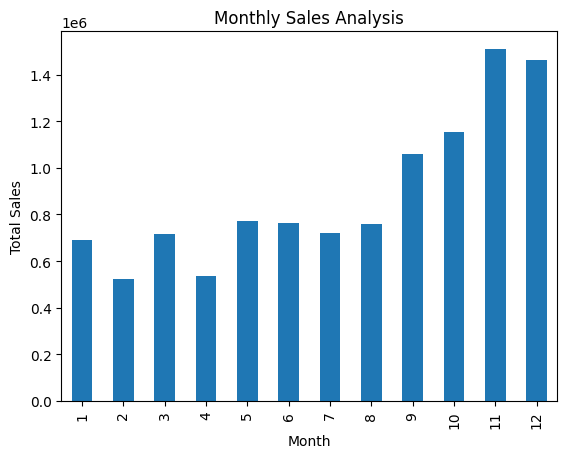

In [ ]:
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Analysis')
plt.show()

In [ ]:
group_country =dataset3.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
group_country.head()

,TotalPrice
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


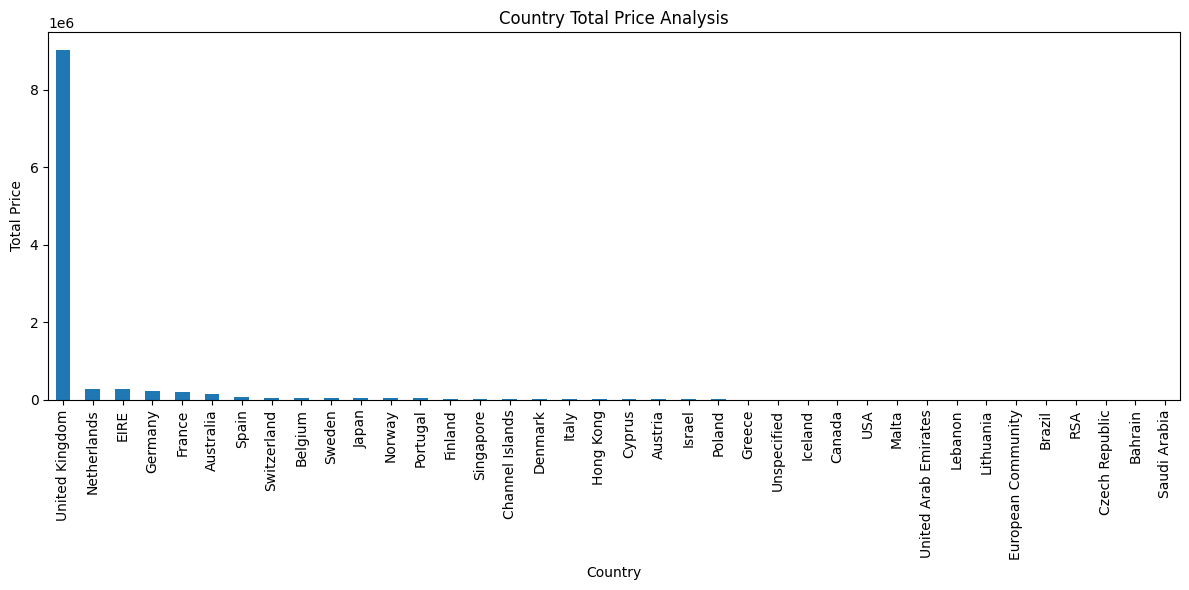

In [ ]:
# prompt: create a line graf for ountry total price analysis

plt.figure(figsize=(12, 6))
group_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.title('Country Total Price Analysis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
dataset3.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Month'],
      dtype='object')

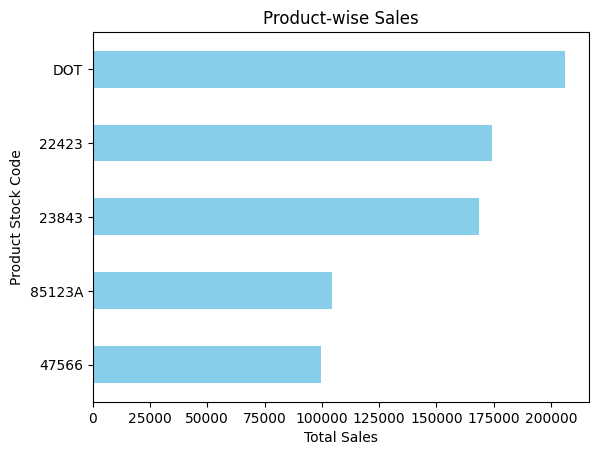

In [ ]:
product_wise_sales = dataset3.groupby('StockCode')['TotalPrice'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()


In [ ]:
product_wise_sales.sort_values(ascending=False)

,TotalPrice
StockCode,
DOT,206248.770
22423,174484.740
23843,168469.600
85123A,104518.800
47566,99504.330
...,...
90084,0.850
21268,0.840
51014c,0.830


In [ ]:
dataset3[dataset3.StockCode=='DOT'].Description.iloc[0]

,Description
1814,DOTCOM POSTAGE
3041,DOTCOM POSTAGE
5450,DOTCOM POSTAGE
5545,DOTCOM POSTAGE
5685,DOTCOM POSTAGE
...,...
536834,DOTCOM POSTAGE
537254,DOTCOM POSTAGE
539368,DOTCOM POSTAGE
540908,DOTCOM POSTAGE


In [ ]:
# getting top 5 product names

for stock_code in top_5_products.index:
    description = dataset3[dataset3.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


In [ ]:
dataset3.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Month'],
      dtype='object')

In [ ]:
currentdate=dataset3['InvoiceDate'].max()+pd.Timedelta(days=1)
rfm = dataset3.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (currentdate - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,4338.0,92.536422,100.014169,1.00,18.000,51.000,142.00,374.00
Frequency,4338.0,91.720609,228.785094,1.00,17.000,41.000,100.00,7847.00
Monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02


In [ ]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4


In [ ]:
rfm.sort_values('RFM_Score',ascending=False).head()

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12


In [ ]:
dataset3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [ ]:
rfm.sort_values('Recency', ascending=False).head()


,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18074.0,374,13,489.60,1,1,2,4
12791.0,374,2,192.60,1,1,1,3
16583.0,374,14,233.45,1,1,1,3
13747.0,374,1,79.60,1,1,1,3
14729.0,374,71,313.49,1,3,2,6


In [ ]:
churn_threshold = 90
churned_customers = rfm[rfm['Recency'] > churn_threshold]
churned_customers.head(5)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.6,1,1,4,6
12350.0,310,17,334.4,1,1,2,4
12353.0,204,4,89.0,1,1,1,3
12354.0,232,58,1079.4,1,3,3,7
12355.0,214,13,459.4,1,1,2,4


Number of Churned Customers: 1449


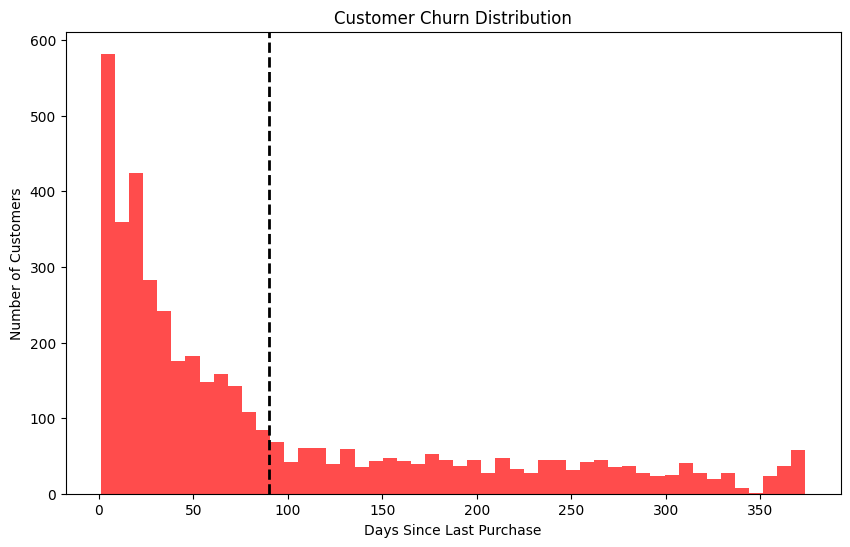

In [ ]:

print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(rfm['Recency'], bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()
